In [ ]:
'''
Object Detection methods
    - One-stage Object Detectors
    - Two-stage Object Detectors
    
Object Detection Algorithms(Family) Evolution (Two stage)
    - RCNN and SPPNet (2014)
    - Fast RCNN and Faster RCNN (2015)
    - Mask R-CNN (2017)
    - Pyramid Networks/FPN (2017)
    - G-RCNN (2021)
    
Object Detection Algorithms Evolution (One stage)
    - YOLO (2016)
    - SSD (2016)
    - RetinaNet (2017)
    - YOLOv3 (2018)
    - YOLOv4 (2020)
    - YOLOR (2021)
    
CenterNet

In [ ]:
'''
Difference between One-stagea and Two-stage Object Detectors
    - In the first stage, the features are extracted from an image and Region of Interests (ROI) are proposed. 
      ROIs consists of a possible box where an object might be in the image.
      
    - The second stage uses features and ROIs to compute final bounding boxes and class probabilities for each of the boxes. 
      These together constitute

In [ ]:
'''
Note: RCNN Family models (Faster RCNN) can be used for Batch processing

In [ ]:
''''
Different Apporach(Algorithm) of Region basedObject Detction Discussed Below

1. CNN : Divides the image into multiple regions and then classify each region into various classes.
   Limitations : Needs a lot of regions to predict accurately and hence high computation time
   
2. RCNN :
    Uses selective search to generate regions. Extracts around 2000 regions from each image.
    Prediction time / image : 40-50 seconds
    Limitation : High computation time as each region is passed to the CNN separately also it uses three different 
                 model for making predictions
                 
3. SPPnet

4. Fast RCNN:
    Each image is passed only once to the CNN and feature maps are extracted. Selective search is used on these maps to 
    generate predictions. Combines all the three models used in RCNN together.
    Prediction time / image : 2 seconds
    Limittaion : Selective search is slow and hence computation time is still high
    
5. Faster RCNN:
    Replaces the selective search method with region proposal network which made the algorithm much faster.
    Prediction time / image : 0.2 seconds
    Limittaion : Object proposal takes time and as there are different systems working one after the other, the performance 
    of systems depends on how the previous system has performed.

#### Region proposals

In [ ]:
'''
Region proposals are simply the smaller regions of the image that possibly contains the objects we are searching for in the 
input image. 
R-CNN uses a greedy algorithm called selective search.

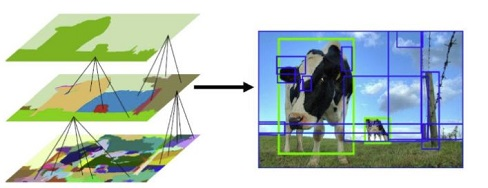

#### Selective Search 

In [ ]:
'''
Selective search is a greedy algorithm that combines smaller segmented regions to generate region proposal.

#### Bounding Box Regressor

In [ ]:
'''
- Bounding-box regression is a popular technique to refine or predict localization boxes in recent object detection approaches.
- Bounding Box parameters are continuous variables. These values are predicted using regression method. 

#### ROI (Region of Interest)

In [ ]:
'''
- A region of interest (ROI) is an area of an image defined for further analysis or processing. 
- RoI (Region of Interest) is a proposed region from the original image

In [ ]:
'''
Differene between ROI and Bounding Box(BB)

A region of interest is a patch of the image which is sent to a classifier; it may not match the ground truth object 
bounding box. 

The bounding box prediction is computed from the features in the region of interest(ROI)

## RCNN

In [ ]:
'''
How RCNN Works

1. Input The Image
2. Extract region proposal (Selective Search Algorithm)
    - 2000 region proposal
3. Warp it to a size fitted for the CNN
    - 227 X 227 RGb Images
4. Forward Eacj Region Through ConvNet
5. Apply Bounidng Box Regressor Classify regions with SVMs

#### RCNN Workflow
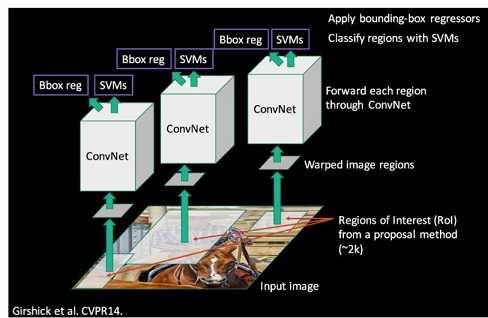

In [ ]:
'''
Steps R-CNN Works

    1.First, an image is taken as an input
    2.Then, we get the Regions of Interest (ROI) using some proposal method (for example, selective search as seen above)
        - Region of Interest(ROI) from a propasal method is 2000
    3. All these regions are then reshaped as per the input of the CNN, and each region is passed to the ConvNet
    4. CNN then extracts features for each region and SVMs are used to divide these regions into different classes
    5. Finally, a bounding box regression (Bbox reg) is used to predict the bounding boxes for each identified region

#### Drawback of R-CNN

In [ ]:
'''
Drawback of R-CNN:
    - Extracting 2,000 regions for each image based on selective search
    - Extracting features using CNN for every image region.  Suppose we have N images, then the number of CNN features 
      will be N*2,000
    - The entire process of object detection using RCNN has three models:
        1. CNN for feature extraction
        2. Linear SVM classifier for identifying objects
        3. Regression model for tightening the bounding boxes.
    - All these processes combine to make RCNN very slow. It takes around 40-50 seconds to make predictions for each new image,
      which essentially makes the model cumbersome and practically impossible to build when faced with a gigantic dataset

In [ ]:
'''
Bousing Box Regression :


## SPPnet

In [ ]:
'''
How SPPnet Works:
    - In RCNN,We have 2,000 image proposals which each of them needed to be processed by a CNN to extract features 
    - Therefore, R-CNN will repeat the ConvNet 2,000 times to extract features.
    - Hence, instead of converting 2,000 regions into the corresponding features maps, we convert the whole image once(Conv5).
    - ROI(Regional of Proposal from a proposal method) generated
    - Warp region of interests (RoIs) into spatial pyramid pooling (SPP) layers.
    - Pass to FC Layer
    - Classify Regions with SVM and Apply Bounding Box Regresssion

#### SPP Layer

In [ ]:
'''
SPP layer
    - The SPP layer pools the features and generates fixed-length outputs, which are then fed into the fully-connected layers
    - Here we warp region of interests (RoIs) into spatial pyramid pooling (SPP) layers.
    - Each spatial pyramid layer is in a different scale, and we use maximum pooling to warp the original RoI to the target 
      map on the right.

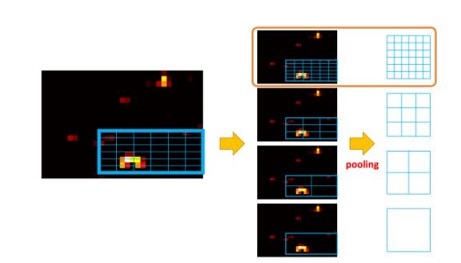

#### SPPnet Workflow
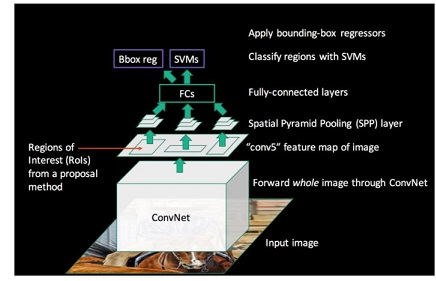

## Fast RCNN

In [ ]:
'''
How Fast RCNN Works
    - As we have seen in the SPPnet Instead of generating a pyramid of layers, Fast R-CNN warps ROIs into one single layer 
      using the RoI pooling.
    - The RoI pooling layer uses max pooling to convert the features in a region of interest into a small feature map 
      of H × W. Both H & W (e.g., 7 × 7) are tunable hyper-parameters
    - You can consider Fast R-CNN is a special case of SPPNet. Instead of multiple layers, Fast R-CNN only use one layer.

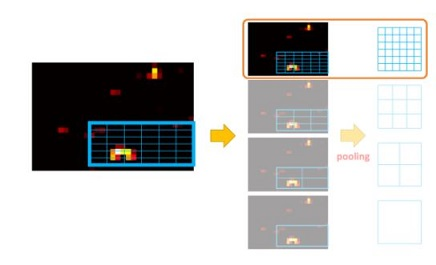

#### Fast RCNN Workflow

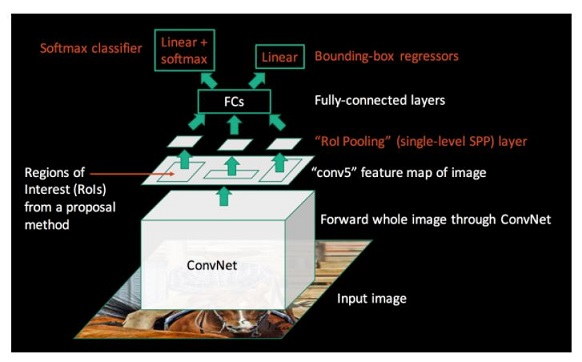

#### Drawback of Fast R-CNN:

In [ ]:
'''
Drawback of Fast R-CNN:
    - The main problem with the Fast R-CNN is the region proposal algorithm (Selective Search), it becomes the bottleneck in 
      terms of speed, it takes 2 seconds per image (on CPU) to generate region proposals.
    - It takes around 2 seconds per image to detect objects, which is much better compared to RCNN. But when we consider 
      large real-life datasets, then even a Fast RCNN doesn’t look so fast anymore.

## Faster RCNN:

In [ ]:
'''
Faster RCNN:
    - Compare to Fast RCNN, here we do not use Reions of Interese(ROI) proposal method to create regions proposals. instead,
      we train a Region proposal network that takes the feature map as input and output regions proposals.
    - Faster R-CNN solves the above problem of Fast R-CNN by introducing a new deep convolution network-based algorithm 
      for computing the region proposals, which is called Region Proposal Network.

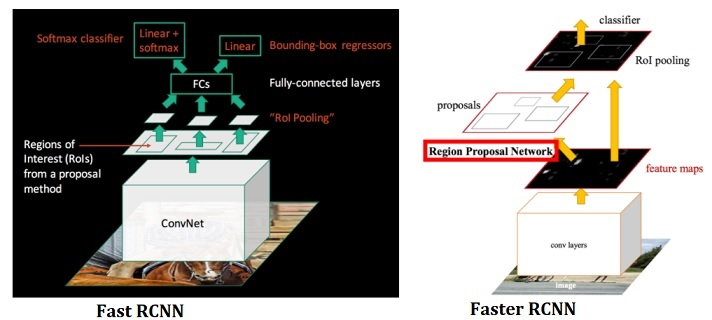

In [ ]:
'''
Steps how Fater RCNN Works

1. We take an image as input and pass it to the ConvNet which returns the feature map for that image.
2. Region proposal network is applied on these feature maps. This returns the object proposals along with their objectness score
3. RoI pooling layer is applied on these proposals to bring down all the proposals to the same size.
4. Finally, the proposals are passed to a fully connected layer which has a softmax layer and a linear regression layer 
   at its top, to classify and output the bounding boxes for objects

#### Region Proposal Network(RPN)

In [ ]:
'''
Region Proposal Network:
    - The region proposal network is a convolution network.
    - The region proposal network uses the feature map of the “conv5” layer as input.
    -  It slides a 3x3 spatial windows over the features maps with depth K. For each sliding window, we output a vector 
       with 256 features. those features are feed into 2 fully-connected networks to compute: